In [1]:
from dataframe import Data
from io_utils import *

In [2]:
from prediction_evaluation import PredictionEvaluation

In [3]:
train_ob = load_ztf_train_data(head_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_master_HEAD.FITS', phot_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_master_PHOT.FITS')
test_ob = load_ztf_test_data(head_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_master_HEAD.FITS', phot_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_master_PHOT.FITS')

In [4]:
prediction_type_nos= [150,151]

In [5]:
sample_numbers_train = {101:150, 
               102:150, 
               103:150, 
               112:150, 
               113:150, 
               114:150, 
               141:150, 
               143:1500, 
               145:2500, 
               150:2500, 
               151:2500, 
               160:150, 
               161:150, 
               162:150, 
               163:150, 
               164:150, 
               170:0, 
               180:0, 
               181:0, 
               183:0, 
               190:0}

In [6]:
sample_numbers_test = {101:150, 
               102:150, 
               103:150, 
               112:150, 
               113:150, 
               114:150, 
               141:150, 
               143:150, 
               145:150, 
               150:2500, 
               151:2500, 
               160:150, 
               161:150, 
               162:150, 
               163:150, 
               164:200, 
               170:0, 
               180:0, 
               181:0, 
               183:0, 
               190:0}

In [7]:
train_ob.create_features_df(prediction_type_nos=prediction_type_nos, features_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_features_master.csv', sample_numbers=sample_numbers_train)

In [8]:
test_ob.create_features_df(prediction_type_nos=prediction_type_nos, features_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_features_master.csv', sample_numbers=sample_numbers_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier

num_pc_components = 3
bands = ['g', 'r']

cols = []
for i,band in enumerate(bands):
    for j in range(1,num_pc_components+1):
        col_name = str(i)+'pc'+str(j)
        cols.append(col_name)
        
x_train = train_ob.features_df[cols].values
y_train = train_ob.features_df['y_true'].values
x_test = test_ob.features_df[cols].values
y_test = test_ob.features_df['y_true'].values



clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
y_score= clf.predict_proba(x_test)


In [10]:
pe = PredictionEvaluation(train_ob=train_ob, test_ob=test_ob,y_pred_train=y_pred_train, y_pred_test=y_pred_test)

1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0,

{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 1

{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 1

{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 1

{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 1

{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 1

{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 1

{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 1

{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 150: 780, 151: 2000, 190: 0}
1
{160: 150, 161: 150, 162: 150, 163: 150, 164: 150, 101: 150, 102: 150, 103: 150, 145: 1000, 170: 0, 183: 0, 141: 150, 143: 1000, 112: 150, 113: 150, 114: 150, 180: 0, 181: 0, 1

[101 102 103 112 113 114 141 143 145 150 151 160 161 162 163 164]
['150: KN GW170817', '151: KN Karsen 2017']
[101 102 103 112 113 114 141 143 145 150 151 160 161 162 163 164]
[101 102 103 112 113 114 141 143 145 160 161 162 163 164]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),)
[101 102 103 112 113 114 141 143 145 150 151 160 161 162 163 164]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


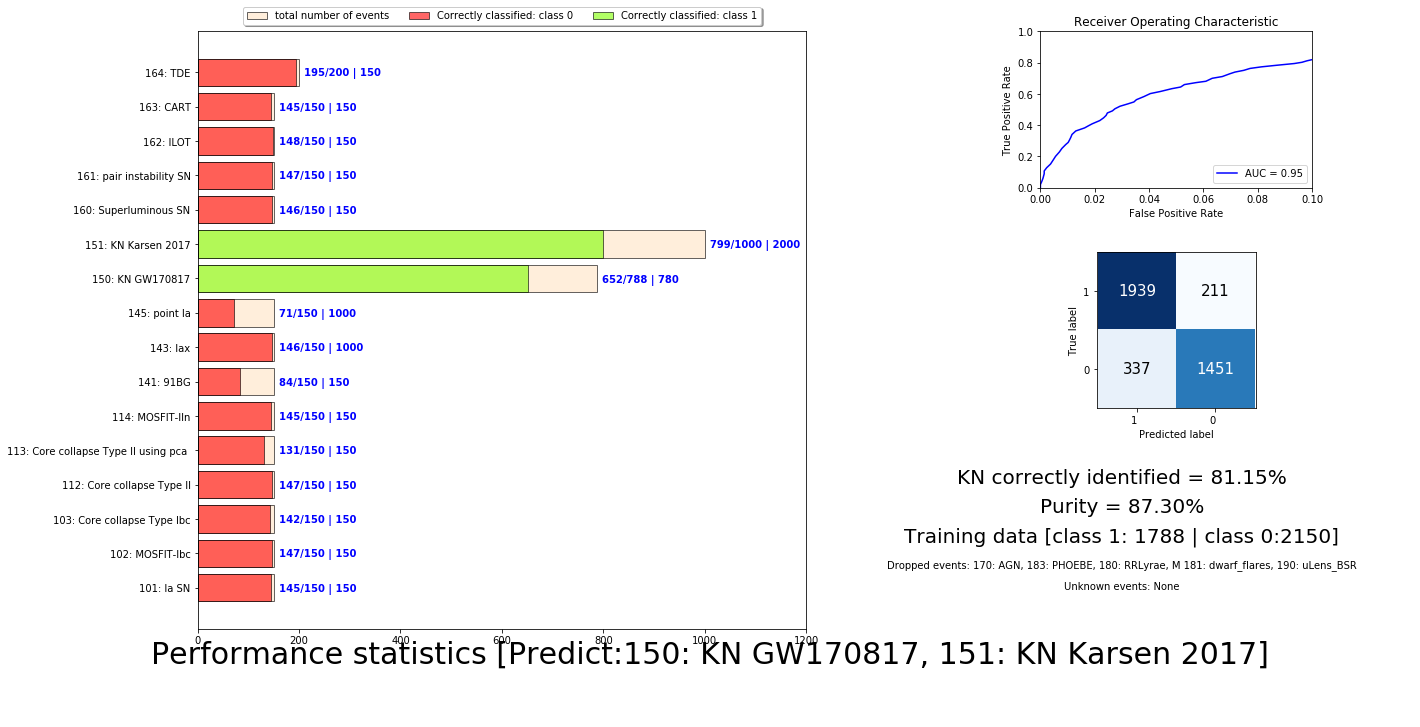

In [11]:
pe.plot_performance_statistics(y_score=y_score, save_fig_path='Final_Results/case7')

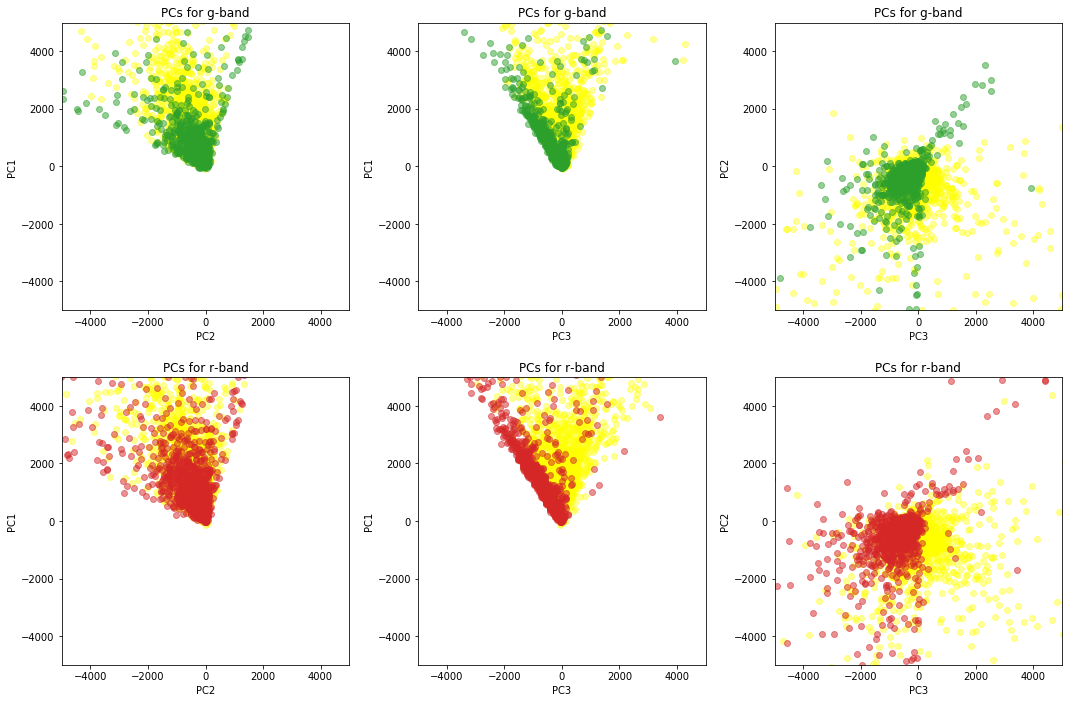

In [12]:
x_limits = (-5000,5000)
y_limits = (-5000,5000)
color_band_dict = {'g':'C2', 'r':'C3'}
test_ob.plot_features_correlation(color_band_dict=color_band_dict, x_limits=x_limits, y_limits=y_limits)

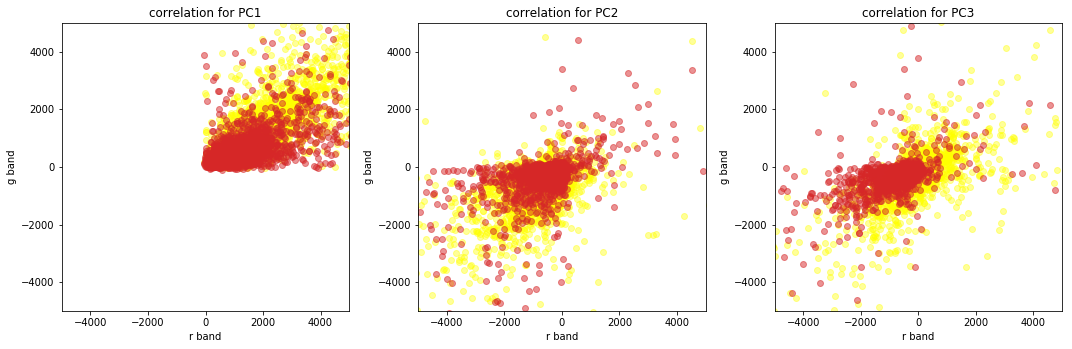

In [13]:
#print(train_df)
x_limits = (-5000,5000)
y_limits = (-5000,5000)
train_ob.plot_band_correlation(color_band_dict=color_band_dict, x_limits=x_limits, y_limits=y_limits)